In [ ]:
#brum

In [1]:
import pandas as pd
from google.oauth2 import service_account

In [2]:
# Прописываем адрес к файлу с данными по сервисному аккаунту и получаем credentials для доступа к данным
credentials = service_account.Credentials.from_service_account_file(
    'iowa-sales-data-533dd461fadb.json')

In [3]:
# Формируем запрос и получаем количество вопросов с тегом "pandas", сгруппированные по дате создания
query = '''
SELECT * 
FROM bigquery-public-data.iowa_liquor_sales.sales f

'''

In [4]:
# Указываем идентификатор проекта
project_id = 'iowa-sales-data'

In [5]:
import google.cloud.bigquery_storage_v1.client
from functools import partialmethod

# Set a two hours timeout
google.cloud.bigquery_storage_v1.client.BigQueryReadClient.read_rows = partialmethod(google.cloud.bigquery_storage_v1.client.BigQueryReadClient.read_rows, timeout=3600*2) 

In [6]:
df = pd.read_gbq(query, project_id=project_id, credentials=credentials)

In [8]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S16017200015,2013-12-02,4148,Fareway Stores #479 / Independence,1400 3RD AVE SE,INDEPENDENCE,50644,POINT (-91.890284 42.455804),10,Buchanan,...,82820,Dekuyper Strawberry Pucker,12,750,6.30,9.45,2,18.90,1.5,0.40
1,INV-11851100053,2018-05-02,2543,Hy-Vee Food Store #1 / Ottumwa,1025 North Quincy Ave,Ottumwa,52501,POINT (-92.438463 41.01558),90,Wapello,...,48699,Martell VSSD,12,375,9.99,14.99,4,59.96,1.5,0.40
2,S19575100120,2014-06-17,2620,Hy-Vee / Windsor Heights,7101 UNIVERSITY AVE,WINDSOR HEIGHTS,50311,None,77,Polk,...,55506,Paramount Cherry Flavored Brandy,12,750,5.48,8.22,2,16.44,1.5,0.40
3,S14012100032,2013-08-20,2964,Dahl's / Ankeny,1802 N ANKENY BLVD,ANKENY,50023,POINT (-93.600365 41.747345),77,Polk,...,5036,Glenlivet 12 Yr Malt Scotch,12,750,22.07,33.11,2,66.22,1.5,0.40
4,S23050800149,2014-12-18,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT (-93.65129 41.626668),77,Polk,...,67595,Patron Xo Cafe,6,750,14.50,21.75,2,43.50,1.5,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19445826,S31371000015,2016-03-22,3822,The Secret Cellar,1205 CURTIS BR RD NE,SWISHER,52338,POINT (-91.646067 41.847398),52,Johnson,...,65257,Jagermeister Liqueur,12,1000,15.54,23.31,4,93.24,4.0,1.06
19445827,S05430800049,2012-05-08,3808,Thriftway,300 4TH ST,LA PORTE CITY,50651,POINT (-92.190813 42.316243),07,Black Hawk,...,65257,Jagermeister Liqueur,12,1000,15.53,23.30,4,93.20,4.0,1.06
19445828,S19003500038,2014-05-19,4897,Gasland #102 / Burlington,1703 MT PLEASANT ST,BURLINGTON,52601,POINT (-91.121931 40.819885),29,Des Moines,...,65253,Jagermeister Liqueur,48,200,3.51,5.27,20,105.40,4.0,1.06
19445829,S26083300014,2015-06-09,4336,Last Call 2,120 N MAIN ST,GEORGE,51237,POINT (-96.002297 43.344294),60,Lyon,...,65257,Jagermeister Liqueur,12,1000,15.54,23.31,4,93.24,4.0,1.06


In [7]:
# смотрим информацию по датайрему, анализируем типы столбцов.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445831 entries, 0 to 19445830
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             object        
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 object        
 7   store_location           object        
 8   county_number            object        
 9   county                   object        
 10  category                 object        
 11  category_name            object        
 12  vendor_number            object        
 13  vendor_name              object        
 14  item_number              object        
 15  item_description         object        
 16  pack                     int64         
 17  bottle_volume_ml         

In [8]:
# выставляем ограничения на количество столбцов и строк
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [9]:
# проверяем на пропущенные значения
df.isna().sum()

invoice_and_item_number          0
date                             0
store_number                     0
store_name                       0
address                      79927
city                         79926
zip_code                     79971
store_location             1864568
county_number               156731
county                      156729
category                     16974
category_name                25040
vendor_number                    5
vendor_name                      3
item_number                      0
item_description                 0
pack                             0
bottle_volume_ml                 0
state_bottle_cost               10
state_bottle_retail             10
bottles_sold                     0
sale_dollars                    10
volume_sold_liters               0
volume_sold_gallons              0
dtype: int64

In [10]:
# имеем пропущенные значения. Выборка размером 19 млн, так что можем удалить строки с пропущенными значениями.
# если бы они были числовыми, можно было бы заменить пропуски на медиану или нули или моду. 
df.dropna(inplace = True)
df.shape

(17488409, 24)

In [11]:
# сделаем сброс индексов, для упрощения работы 
df = df.reset_index()
df = df.drop(["index"], axis = 1)

In [12]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')

In [24]:
# посмотрим на количество городов и вхождения в них
df.city.value_counts()

Des Moines           793181
DES MOINES           750575
Cedar Rapids         634381
CEDAR RAPIDS         566478
Davenport            358938
DAVENPORT            348137
Sioux City           303301
Council Bluffs       289978
Waterloo             282896
West Des Moines      260356
IOWA CITY            254805
COUNCIL BLUFFS       253100
SIOUX CITY           247069
Iowa City            245278
WATERLOO             241432
Dubuque              229637
Cedar Falls          217574
Ames                 212437
WEST DES MOINES      211803
DUBUQUE              201970
AMES                 191430
CEDAR FALLS          165571
Coralville           158672
Ankeny               146114
Mason City           141423
MASON CITY           131862
Muscatine            131010
Bettendorf           127544
CORALVILLE           122494
BETTENDORF           122296
Urbandale            117833
MUSCATINE            112405
Burlington           109997
Fort Dodge           108697
CLINTON              106621
FORT DODGE          

In [31]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,S16017200015,2013-12-02,4148,Fareway Stores #479 / Independence,1400 3RD AVE SE,INDEPENDENCE,50644,POINT (-91.890284 42.455804),10,Buchanan,1081355,STRAWBERRY SCHNAPPS,65,Jim Beam Brands,82820,Dekuyper Strawberry Pucker,12,750,6.30,9.45,2,18.90,1.5,0.40
1,INV-11851100053,2018-05-02,2543,Hy-Vee Food Store #1 / Ottumwa,1025 North Quincy Ave,Ottumwa,52501,POINT (-92.438463 41.01558),90,Wapello,1092100,Imported Distilled Spirit Specialty,370,PERNOD RICARD USA,48699,Martell VSSD,12,375,9.99,14.99,4,59.96,1.5,0.40
2,S14012100032,2013-08-20,2964,Dahl's / Ankeny,1802 N ANKENY BLVD,ANKENY,50023,POINT (-93.600365 41.747345),77,Polk,1012210,SINGLE MALT SCOTCH,370,Pernod Ricard USA/Austin Nichols,5036,Glenlivet 12 Yr Malt Scotch,12,750,22.07,33.11,2,66.22,1.5,0.40
3,S23050800149,2014-12-18,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT (-93.65129 41.626668),77,Polk,1081030,COFFEE LIQUEURS,410,The Patron Spirits Company,67595,Patron Xo Cafe,6,750,14.50,21.75,2,43.50,1.5,0.40
4,S23270900147,2014-12-30,2515,Hy-Vee Food Store #1 / Mason City,2400 4TH ST SW,MASON CITY,50401,POINT (-93.235588 43.148451),17,Cerro Gordo,1081700,DISTILLED SPIRITS SPECIALTY,346,"Ole Smoky Distillery, LLC",86724,Ole Smoky Apple Pie Moonshine,12,750,8.50,15.00,2,30.00,1.5,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17488404,S31371000015,2016-03-22,3822,The Secret Cellar,1205 CURTIS BR RD NE,SWISHER,52338,POINT (-91.646067 41.847398),52,Johnson,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65257,Jagermeister Liqueur,12,1000,15.54,23.31,4,93.24,4.0,1.06
17488405,S05430800049,2012-05-08,3808,Thriftway,300 4TH ST,LA PORTE CITY,50651,POINT (-92.190813 42.316243),07,Black Hawk,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65257,Jagermeister Liqueur,12,1000,15.53,23.30,4,93.20,4.0,1.06
17488406,S19003500038,2014-05-19,4897,Gasland #102 / Burlington,1703 MT PLEASANT ST,BURLINGTON,52601,POINT (-91.121931 40.819885),29,Des Moines,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65253,Jagermeister Liqueur,48,200,3.51,5.27,20,105.40,4.0,1.06
17488407,S26083300014,2015-06-09,4336,Last Call 2,120 N MAIN ST,GEORGE,51237,POINT (-96.002297 43.344294),60,Lyon,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65257,Jagermeister Liqueur,12,1000,15.54,23.31,4,93.24,4.0,1.06


In [13]:
# посмотрим на минимальную и максимальную дату. 
df.date.min(), df.date.max()

(Timestamp('2012-01-03 00:00:00'), Timestamp('2020-08-31 00:00:00'))

### Видим, что данные представлены за 8 лет, анализ данных по дням будет слишком на низкоуровневым. По этому вполне логично вытянуть год, месяц и неделю из даты. 

In [14]:
df["year"] = df['date'].dt.year
df["month"] = df['date'].dt.month
df["day"] = df['date'].dt.day
df["week"] = df['date'].dt.week

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [14]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,week
0,S16017200015,2013-12-02,4148,Fareway Stores #479 / Independence,1400 3RD AVE SE,INDEPENDENCE,50644,POINT (-91.890284 42.455804),10,Buchanan,1081355,STRAWBERRY SCHNAPPS,65,Jim Beam Brands,82820,Dekuyper Strawberry Pucker,12,750,6.30,9.45,2,18.90,1.5,0.40,2013,12,2,49
1,INV-11851100053,2018-05-02,2543,Hy-Vee Food Store #1 / Ottumwa,1025 North Quincy Ave,Ottumwa,52501,POINT (-92.438463 41.01558),90,Wapello,1092100,Imported Distilled Spirit Specialty,370,PERNOD RICARD USA,48699,Martell VSSD,12,375,9.99,14.99,4,59.96,1.5,0.40,2018,5,2,18
2,S14012100032,2013-08-20,2964,Dahl's / Ankeny,1802 N ANKENY BLVD,ANKENY,50023,POINT (-93.600365 41.747345),77,Polk,1012210,SINGLE MALT SCOTCH,370,Pernod Ricard USA/Austin Nichols,5036,Glenlivet 12 Yr Malt Scotch,12,750,22.07,33.11,2,66.22,1.5,0.40,2013,8,20,34
3,S23050800149,2014-12-18,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,POINT (-93.65129 41.626668),77,Polk,1081030,COFFEE LIQUEURS,410,The Patron Spirits Company,67595,Patron Xo Cafe,6,750,14.50,21.75,2,43.50,1.5,0.40,2014,12,18,51
4,S23270900147,2014-12-30,2515,Hy-Vee Food Store #1 / Mason City,2400 4TH ST SW,MASON CITY,50401,POINT (-93.235588 43.148451),17,Cerro Gordo,1081700,DISTILLED SPIRITS SPECIALTY,346,"Ole Smoky Distillery, LLC",86724,Ole Smoky Apple Pie Moonshine,12,750,8.50,15.00,2,30.00,1.5,0.40,2014,12,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17488404,S27441800046,2015-08-20,3456,Quick Shop / Clear Lake,904 N 8TH ST,CLEAR LAKE,50428,POINT (-93.378772 43.142868),17,Cerro Gordo,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65257,Jagermeister Liqueur,12,1000,15.54,23.31,4,93.24,4.0,1.06,2015,8,20,34
17488405,S05359600058,2012-05-03,3805,Washington Street Mini Mart,1601 WASHINGTON ST,DAVENPORT,52084,POINT (-90.665741 42.508947),82,Scott,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65257,Jagermeister Liqueur,12,1000,15.53,23.30,4,93.20,4.0,1.06,2012,5,3,18
17488406,S29007300030,2015-11-11,3723,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,POINT (-96.095845 42.025841),67,Monona,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65257,Jagermeister Liqueur,12,1000,15.54,23.31,4,93.24,4.0,1.06,2015,11,11,46
17488407,S32044800081,2016-04-28,2582,Hy-Vee #2 Food Store / Mason City,551 S ILLINOIS AVE,MASON CITY,50401,POINT (-93.17114 43.14623),17,Cerro Gordo,1082900,MISC. IMPORTED CORDIALS & LIQUEURS,192,Sidney Frank Importing Co.,65257,Jagermeister Liqueur,12,1000,15.54,23.31,4,93.24,4.0,1.06,2016,4,28,17


In [15]:
# посмотрим как менялась сумма продаж по годам. 
look = df.loc[:, ["year", "month", 'week', "day", "sale_dollars"]]
f_p = look.groupby('year').sale_dollars.agg(["sum"])
f_p = f_p.reset_index()
f_p.sum

<bound method DataFrame.sum of    year           sum
0  2012  2.327483e+08
1  2013  2.357928e+08
2  2014  2.476550e+08
3  2015  2.602838e+08
4  2016  2.601604e+08
5  2017  2.795968e+08
6  2018  3.045048e+08
7  2019  3.190198e+08
8  2020  2.288986e+08>

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

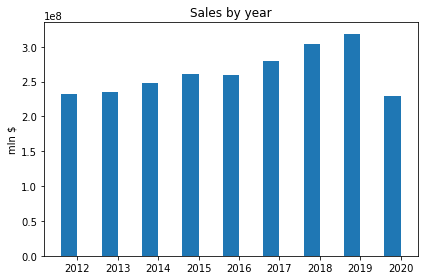

In [53]:
labels = f_p["year"]
ss = f_p["sum"]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ss, width, label='sales')

ax.set_ylabel('mln $')
ax.set_title('Sales by year')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

In [54]:
# как видим, явно растущий тренд. стоит так же помнить, что данные за 2020 неполные.

### Аналогичные действия повторим с обьемом жидкости.

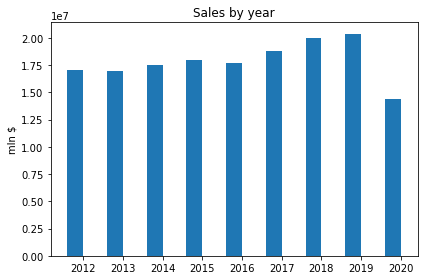

In [56]:
# посмотрим как менялась сумма продаж по годам. 
look = df.loc[:, ["year", "month", 'week', "day", "volume_sold_liters"]]
f_p = look.groupby('year').volume_sold_liters.agg(["sum"])
f_p = f_p.reset_index()

labels = f_p["year"]
ss = f_p["sum"]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, ss, width, label='sales')

ax.set_ylabel('mln $')
ax.set_title('Sales by year')
ax.set_xticks(x)
ax.set_xticklabels(labels)

fig.tight_layout()

plt.show()

#### теперь посмотрим на корреляцию между переменными в датафрейме 

In [21]:
df.corr().sale_dollars

pack                  -0.046666
bottle_volume_ml       0.063179
state_bottle_cost      0.102229
state_bottle_retail    0.102266
bottles_sold           0.832867
sale_dollars           1.000000
volume_sold_liters     0.840880
volume_sold_gallons    0.840882
year                   0.017528
month                  0.010485
day                   -0.003268
week                   0.010341
Name: sale_dollars, dtype: float64

####  Поскольку целевой переменной в этой таблице логично использовать sale_dollars, то и корреляции смотреть с этой переменной. Мы видим, что наибольная корреляция с bottles_sold и volume_sold_liters, что в принципе логично.

In [28]:
# теперь можно удалить избыточные переменные, например в галлонах. 
df = df.drop(["volume_sold_gallons", "invoice_and_item_number"], axis = 1)

#### Теперь поработаем с последним полным годом, к примеру 2019. И проанализируем уже в его разрезе.

In [29]:
df9 = df[df.year == 2019]

In [30]:
# найдем те города, где больше всего совершалось покупок.
df9.city.value_counts()

Des Moines           183521
Cedar Rapids         147709
Davenport             84102
Sioux City            73306
Council Bluffs        66948
Waterloo              65321
West Des Moines       59054
Iowa City             57473
Dubuque               54322
Cedar Falls           49338
Ames                  48175
Coralville            37977
Ankeny                34113
Mason City            32311
Muscatine             30879
Bettendorf            30022
Urbandale             27114
Fort Dodge            26230
Marshalltown          25354
Burlington            24752
Clinton               23989
Altoona               18301
Ottumwa               18232
Keokuk                16378
Spencer               15889
Newton                15365
Storm Lake            15030
Waukee                14533
Johnston              14146
Waverly               13542
Clear Lake            13002
Boone                 12991
Grimes                12698
Oskaloosa             12163
Carroll               12017
North Liberty       

In [31]:
df9

,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day,week
704,2019-10-23,2556,Hy-Vee Wine and Spirits / Estherville,1033 Central Avenue,Estherville,51334,POINT (-94.829962 43.402096),32,EMMET,1031100,American Vodkas,380,Phillips Beverage,37348,Phillips Vodka,6,1750,7.60,11.40,6,68.40,10.5,2019,10,23,43
710,2019-12-17,2538,Hy-Vee Food Store #3 / Waterloo,1422 Flammang Dr,Waterloo,50702,POINT (-92.327917 42.459938),7,BLACK HAWK,1031100,American Vodkas,229,DEHNER DISTILLERY,36875,Blue Ox Vodka,6,1750,6.50,9.75,6,58.50,10.5,2019,12,17,51
711,2019-11-06,4405,KUM & GO #92 / ANKENY,1025 E 1st St,Ankeny,50021,POINT (-93.58166 41.731869),77,POLK,1031100,American Vodkas,434,LUXCO INC,36308,Hawkeye Vodka,6,1750,7.17,10.76,6,64.56,10.5,2019,11,6,45
713,2019-04-03,5225,The Station II / North Liberty,"620, Meade Dr",North Liberty,52317,POINT (-91.608704 41.752665),52,JOHNSON,1031100,American Vodkas,434,LUXCO INC,36308,Hawkeye Vodka,6,1750,7.17,10.76,6,64.56,10.5,2019,4,3,14
714,2019-10-16,4236,Fareway Stores #551 / Eagle Grove,205 NW 1st St,Eagle Grove,50533,POINT (-93.903801 42.665165),99,WRIGHT,1031100,American Vodkas,259,Heaven Hill Brands,35418,Burnetts Vodka 80prf,6,1750,9.49,14.24,6,85.32,10.5,2019,10,16,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17482596,2019-09-27,4794,Smokin' Joe's #17 Tobacco and Liquor Outlet,110 S Roosevelt Hwy 61,Burlington,52601,POINT (-91.141203 40.80943700000001),29,DES MOINES,1082000,Imported Cordials & Liqueurs,035,BACARDI USA INC,47863,D'usse VSOP,12,375,16.34,24.51,4,98.04,1.5,2019,9,27,39
17482598,2019-05-07,4604,Pit Stop Liquors / Newton,"1324, 1st Ave E",Newton,50208,POINT (-93.035654 41.699173),50,JASPER,1082000,Imported Cordials & Liqueurs,240,William Grant & Sons Inc,64876,Drambuie Liqueur,12,750,22.00,33.00,2,66.00,1.5,2019,5,7,19
17482600,2019-09-05,2585,Hy-Vee Wine and Spirits / Algona,1516 Highway 169 North,Algona,50511,POINT (-94.236003 43.081288),55,KOSSUTH,1082000,Imported Cordials & Liqueurs,421,SAZERAC COMPANY INC,66636,Romana Sambuca Italian Liquore,12,750,13.50,20.25,2,40.50,1.5,2019,9,5,36
17482601,2019-05-22,2605,Hy-Vee Drugstore #5 / Cedar Rapids,2001 Blairs Ferry Road NE,Cedar Rapids,52402,POINT (-91.668909 42.034799),57,LINN,1082000,Imported Cordials & Liqueurs,085,Brown Forman Corp.,64676,Chambord Liqueur Royale De France,12,750,19.08,28.62,2,57.24,1.5,2019,5,22,21


In [52]:
top_sal = df9.category_name.value_counts()[:12]
top_sal = pd.DataFrame(top_sal)
top_sal = top_sal.reset_index()
top_sal
# посмотрим на топ 12 видов алкоголя по продаже.

,index,category_name
0,American Vodkas,329674
1,Canadian Whiskies,215708
2,Straight Bourbon Whiskies,138225
3,Whiskey Liqueur,110480
4,Spiced Rum,104286
5,American Flavored Vodka,103763
6,Blended Whiskies,90665
7,Imported Vodkas,72356
8,American Schnapps,71268
9,American Brandies,68692


In [61]:

s_g = df9.groupby(["city", "category_name"]).agg(["sum"]).reset_index()

In [64]:
s_g

,city,category_name,store_number,store_name,address,zip_code,store_location,county_number,county,category,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,year,month,day,week
,,,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,Ackley,100% Agave Tequila,5720441554915491,Casey's General Store #1921- AckleyKUM & GO #5...,512 Sherman Avenue420 Sherman St526 Main St526...,50601506015060150601,POINT (-93.055213 42.556729)POINT (-93.056656 ...,42424242,HARDINHARDINHARDINHARDIN,1022200102220010222001022200,410410410410,Patron Spirits CompanyPatron Spirits CompanyPa...,88294882948829688296,Patron SilverPatron SilverPatron SilverPatron ...,48,2250,84.00,126.00,10,315.00,5.62,8076,22,50,88
1,Ackley,American Brandies,5491549154915491549154915491,Ackley SuperfoodsAckley SuperfoodsAckley Super...,526 Main St526 Main St526 Main St526 Main St52...,50601506015060150601506015060150601,POINT (-93.055216 42.554159)POINT (-93.055216 ...,42424242424242,HARDINHARDINHARDINHARDINHARDINHARDINHARDIN,1051100105110010511001051100105110010511001051100,434055259434055434205,LUXCO INCSAZERAC NORTH AMERICAHeaven Hill Bran...,55087544365600654447544365524652599,Paramount Blackberry BrandyMr Boston Apricot B...,84,6000,40.11,60.18,21,184.68,18.50,14133,20,118,76
2,Ackley,American Cordials & Liqueur,5720572054915491549154915491549154915720549157...,Casey's General Store #1921- AckleyCasey's Gen...,512 Sherman Avenue512 Sherman Avenue526 Main S...,5060150601506015060150601506015060150601506015...,POINT (-93.055213 42.556729)POINT (-93.055213 ...,424242424242424242424242424242424242,HARDINHARDINHARDINHARDINHARDINHARDINHARDINHARD...,1081300108130010813001081300108130010813001081...,3223222593222593223222592593223223223223222594...,Prestige Wine & Spirits GroupPrestige Wine & S...,7521075212737027519873702751987521073702737027...,Kinky PinkKinky Blue MiniEvan Williams HoneyKi...,144,12500,142.46,213.69,102,1154.91,71.75,36342,94,261,378
3,Ackley,American Distilled Spirit Specialty,5720,Casey's General Store #1921- Ackley,512 Sherman Avenue,50601,POINT (-93.055213 42.556729),42,HARDIN,1091100,154,DUNKEL CORPORATION,77805,Saints N Sinners Apple Pie,12,750,8.00,12.00,6,72.00,4.50,2019,4,16,16
4,Ackley,American Dry Gins,5491549154915491549157205491549154915491549154...,Ackley SuperfoodsAckley SuperfoodsAckley Super...,526 Main St526 Main St526 Main St526 Main St52...,5060150601506015060150601506015060150601506015...,POINT (-93.055216 42.554159)POINT (-93.055216 ...,4242424242424242424242424242424242424242424242...,HARDINHARDINHARDINHARDINHARDINHARDINHARDINHARD...,1041100104110010411001041100104110010411001041...,2972972972972973702972972972974342974344342972...,Laird & CompanyLaird & CompanyLaird & CompanyL...,2999829998299972999829997322362999829998299972...,Five O'Clock GinFive O'Clock GinFive O'Clock G...,222,34250,148.42,222.74,188,1548.39,237.75,50475,161,405,664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13384,Zwingle,Straight Bourbon Whiskies,488548854885488548854885,SNK Gas & Food LLCSNK Gas & Food LLCSNK Gas & ...,"18820, Bellevue Cascade Rd18820, Bellevue Casc...",520795207952079520795207952079,POINT (-90.676817 42.240381)POINT (-90.676817 ...,494949494949,JacksonJacksonJacksonJacksonJacksonJackson,101120010112001011200101120010112001011200,065065065065065259,Jim Beam BrandsJim Beam BrandsJim Beam BrandsJ...,277801906619063190641906117127,Jim Beam Apple MiniJim BeamJim BeamJim BeamJim...,120,3325,35.30,52.95,98,750.00,36.60,12114,29,100,119
13385,Zwingle,Temporary & Specialty Packages,4885488548854885,SNK Gas & Food LLCSNK Gas & Food LLCSNK Gas & ...,"18820, Bellevue Cascade Rd18820, Bellevue Casc...",52079520795207952079,POINT (-90.676817 42.240381)POINT (-90.676817 ...,49494949,JacksonJacksonJacksonJackson,1701100170110017011001701100,2602600350

### Какие выводы можно сделать после разведовательного анализа данных: 1. По потребности можно строить график динамики продаж того или иного вида алкоголя, в разрезе елементов даты, населенных пунктов, точек продажи, поставщика(производителя) и т.д.
#### По матрице корреляций можно сказать, что зависимыми переменными были бы обьем бутылок и их количество, которые прямо влияют на сумму проданной продукции. В принципе, логика в этом есть.

#### Моделировать продажи можно через временные ряды, а именно auto.arima и комбинацию с Prophet by facebook, потому что построить качественную регрессию на этих признаках мне не представляется возможным.

#### Необходимо брать окно в неделю или месяц, потому что ежедневные продажы - вещь довольно таки стохастическая и точно построить прогноз будет тяжело. Слишком много факторов влияют. Срез брать по населенному пункту и типу алкоголя. И уже по этому groupby([time, type]), я бы строил прогноз для ряда.

#### Будет явно выражена сезонность, возможно нужно будет бороться с ней и в том числе с логарифмированием или дифференциированием ряда. 

#### В работе можно было бы построить намного больше графиков и различных срезов. К сожалению, постоянно отваливалось ядро и jupyter был недоступен, приходилось каждый раз заново  запускать через SSH и загружать данные.

#### Есть перечень городов с наибольшим количеством продаж и видов алкоголя. Первое место занимает Des Moines и American Vodkas соответственно. 

#### Аналогично, можно еще воспользоваться библиотекой basemap или folium для нанесения продаж на карту. Координаты есть.

